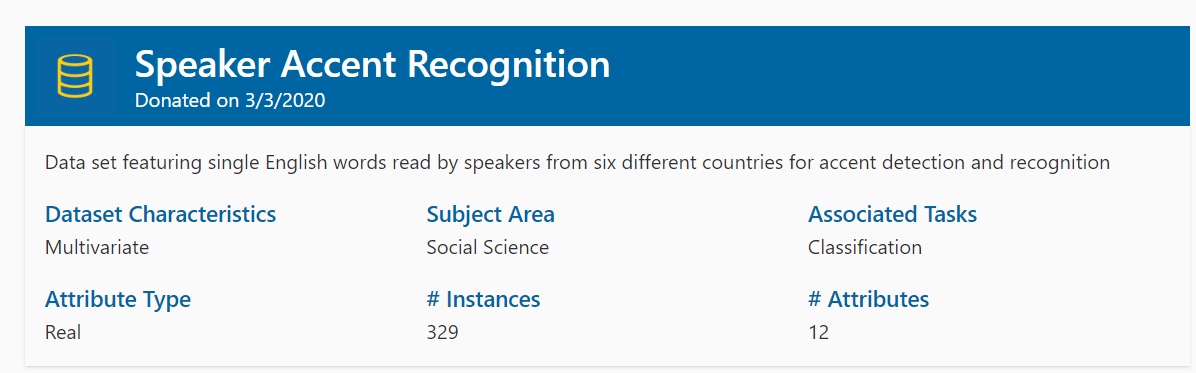


##  Data    
<a href="https://archive.ics.uci.edu/dataset/518/speaker+accent+recognition">UCI machine learning</a>,  <a href="https://www.kaggle.com/datasets/singhakash/speaker-accent-recognition-datasets">Kaggle</a>
    

## Objectives

After completing this lab you will be able to:

* Use **IBM** SnapML algorithms to classify


**Additional Information**

Data set featuring single English words read by speakers from six different countries for accent detection and recognition


Response variable: 
language = {ES, FR, GE, IT, UK, US} The six possible accents considered

Explanatory variables:
X1, X2, ..., X12 Obtained using MFCC on the original time domain soundtrack of the maximum 1s of reading of a word



<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#load_dataset">Load the  data</a></li>
        <li><a href="#modeling">Modeling</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
        <li><a href="#practice">Practice</a></li>
    </ol>
</div>
<br>
<hr>


## import packages


In [1]:
#!pip install snapml

In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import scipy.optimize as opt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, \
f1_score, classification_report,ConfusionMatrixDisplay # for model evaluation
%matplotlib inline 
import matplotlib.pyplot as plt

# the dataset in sklearn
from sklearn import datasets


import pickle # save the model

# suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load Data


In [3]:
## Load the dataset
speech_recognition = pd.read_csv('accent-mfcc-data-1.csv')

## Basic EDA

In [4]:
# to rows of the dataset
speech_recognition.head()

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


In [5]:
# shape of the data
speech_recognition.shape

(329, 13)

**Missing values**

In [6]:
# check for missing values
speech_recognition.isna().any().sum()

0

**Distribution of the dataset**

In [7]:
# let see if we dealing the imbalance dataset
speech_recognition['language'].value_counts()

US    165
UK     45
FR     30
GE     30
IT     30
ES     29
Name: language, dtype: int64

In [8]:
# let see if we dealing the imbalance dataset
speech_recognition['language'].value_counts(normalize=True)

US    0.501520
UK    0.136778
FR    0.091185
GE    0.091185
IT    0.091185
ES    0.088146
Name: language, dtype: float64

**Data distribution:** US make up 50.15% of the dataset

In [ ]:
# plot of the distribution
sns.countplot(data=speech_recognition, x='language', hue='language').set(title = " Value count the languaguages");

## Data pre-processing and selection, Train/Test


Let's set the Target and features

In [ ]:
#target arrays
y = speech_recognition['language']

In [ ]:
# drop the target 
speech_recognition.drop('language', axis = 1, inplace = True) 

In [ ]:
# Create features
X = speech_recognition.copy()

In [ ]:
# check the columns to see if we have dropped the 'Result' and 'id'
X.columns

**Train test split the dataset**

In [ ]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=365, stratify=y)

Let's convert to an array so that sklearn find's it easy

In [ ]:
# assign to the y variable
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [ ]:
# assign the features
x_train = np.asarray(X_train)
x_test = np.asarray(X_test)

In [ ]:
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

## Feature scaling


In [ ]:
scaler = StandardScaler() # scaler objecy
x_train = scaler.fit_transform(x_train) # allow the scaler object to learn the features and transform the training data
x_test =  scaler.transform(x_test) # apply the learned features on the test set

In [ ]:
# scaled x_train
x_train[0:1]

In [ ]:
# scaled x_test
x_test[0:1]

<div id="svm_snap">
    <h2>Build a RandomForest model with Snap ML</h2>
</div>


In [ ]:
%%time
# import the RandomForest from Snap ML
from snapml import RandomForestClassifier as SnapForest

# in contrast to scikit-learn's LinearSVC, Snap ML offers multi-threaded CPU/GPU training of RandomForest
# to use the GPU, set the use_gpu parameter to True
# rf = SnapForest(class_weight='balanced', random_state=25, use_gpu=True, fit_intercept=False)

# to set the number of threads used at training time, one needs to set the n_jobs parameter
rf = SnapForest(n_estimators=75, criterion='gini', 
                            max_depth=10, min_samples_leaf=1, 
                            max_features='auto', bootstrap=True, 
                            n_jobs=1, random_state=10, verbose=False, 
                            use_histograms=False, hist_nbins=256, 
                            use_gpu=False, gpu_ids=[0], 
                            compress_trees=False)

# train an random forest model using Snap ML
clf = rf.fit(x_train, y_train)

After being fitted, the model can then be used to predict new values:


In [ ]:
yhat = clf.predict(x_test)
yhat[0:5]

**Metrics**

In [ ]:
Random_f1 = f1_score(y_test, yhat, average='weighted')
Random_accuracy = accuracy_score(y_test, yhat)
Random_precision = precision_score(y_test, yhat, average='micro')

print("Avg F1-score: %.4f" % Random_f1)
print("Accuracy: %.4f" % Random_accuracy)
print("Precision: %.4f" % Random_precision)

**Save the RandomForest model:**

In [ ]:
#save the trained model
pickle.dump(clf, open('SpeakerAccentRecognition_RF.pkl','wb'))

<h2 id="evaluation">Evaluation</h2>


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [ ]:
# classification report
print (classification_report(y_test, yhat,labels=np.unique(yhat)))

**Confusion Matrix display:**

In [ ]:
# confusion matrics
disp = ConfusionMatrixDisplay.from_predictions(y_test, yhat)
disp.figure_.suptitle("Confusion Matrix")

plt.show()


print(f"Confusion matrix:\n{disp.confusion_matrix}")

### **Report**

In [ ]:
metric = {
  "Accuracy": [str(round(Random_f1*100,2))+"%"],
  "F1 score" : [str(round(Random_accuracy*100,2))+"%"],
  "Precision": [str(round(Random_precision*100,2))+"%"]
}




Report = pd.DataFrame(metric)
Report = Report.rename(index={ 0:'Random Forest'})

In [ ]:
# now print the classification report
Report 

### **Now over to you TUNE the PARAMETERS to see if the ACCURACY and F1-SCORE will improve.**

# Thank you for completing this lab!